## Probando el twitter tokenizer de nltk

In [1]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

### Obtengo textos a partir de un archivo csv

In [2]:
import csv
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

prov = 'chaco'

texts = []
with open('train/train_{}.csv'.format(prov),'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        texts.append(row[2]) 
       

## Ejemplo de uso de tokenizador

In [28]:
print texts[300]
for w in tknzr.tokenize(texts[0]):
    print w

Feliz navidad para todos.. Mucho amor y felicidad para el mundo entero..
ni
siquiera
un
fernet
?
?


In [22]:
i = 0
stop = 100
palabras = []
for word,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
    palabras.append(word)
    if i == stop:
        break
    i += 1
for p in palabras:
    print p
    

jajaja
jaja
jajajaja
q
jajajajaja
asi
dia
teres
jajaj
jajajaj
jajajajajaja
we
i
river
hdp
lpm
x
pessoas
finde
breñas
the
and
seu
xq
facebook
unfollowers
xd
via
you
charata
siii
by
aca
jajajajajajaja
twitter
queres
c
despues
dias
ahi
nose
tw
nooo
m
tambien
jajajajaj
people
new
followers
veni
follower
chau
followed
promo
wpp
one
estan
foi
ok
amooo
pa
sabado
stats
s
n
mmm
qe
love
nas
weee
just
automatically
checked
peli
paaa
todavia
free
p
recien
unfollowed
messi
t
vamo
my
goool
posted
yaaa
photo
rt
hs
super
b
jajajajajajajaja
dormirrr
musica
l
pibes
gym
bue
pibe
unico


## Veo que palabras están en el diccionario y cuáles no [Usando pyenchant]

In [4]:
import enchant
d = enchant.Dict("es_AR")
noestan = {}
estan = {}
words  = {}
for text in texts:
    for w in tknzr.tokenize(text):
        if w.isalpha():
            if words.has_key(w):
                words[w] += 1
            else:
                words[w] = 1
#estan = sum([d.check(w) for w in words])
for word,cant in words.iteritems():
    if not(d.check(word)):
        noestan[word] = cant
    else:
        estan[word] = cant
        


cant_estan = sum([c for c in estan.values()])
cant_noestan = sum([c for c in noestan.values()])
print 'Cantidades totales: ',cant_estan,cant_noestan,cant_estan/float(cant_estan+cant_noestan)
print 'Cantidades unicas: ' ,len(estan),len(noestan), len(estan)/float(len(estan)+len(noestan))
#i = 0
#for w,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
#    if c < 10:
#        break
#    i +=1
#    print i,w,c

Cantidades totales:  1590930 246428 0.865879159097
Cantidades unicas:  30081 41711 0.419002117228


In [13]:
import enchant, difflib
i = 0

for word,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
    dicc = {}
    a = set(d.suggest(word))
    for b in a:
        tmp = difflib.SequenceMatcher(None, word, b).ratio();
        dicc[tmp] = b
    print word,dicc
    if i == 100:
            break
    i += 1

jajaja {0.7272727272727273: u'ajada', 0.5454545454545454: u'ahaja'}
jaja {0.75: u'jaca', 0.8888888888888888: u'jauja', 0.8571428571428571: u'aja'}
jajajaja {0.42857142857142855: u'alhaja', 0.4: u'agasaja'}
q {0.0: u'y'}
jajajajaja {0.42105263157894735: u'agasajara'}
asi {0.3333333333333333: u'isa', 0.6666666666666666: u'as\xed', 0.8: u'si', 0.8571428571428571: u'asir'}
dia {0.6666666666666666: u'ida', 0.8: u'da', 0.8571428571428571: u'diga'}
teres {0.8888888888888888: u'tres', 0.6: u'retes', 0.9090909090909091: u'\xe9teres', 0.8: u'tetes'}
jajaj {0.75: u'aja'}
jajajaj {0.5: u'ahaja', 0.6666666666666666: u'ajada', 0.46153846153846156: u'alhaja'}
jajajajajaja {0.36363636363636365: u'atarrajara'}
we {0.5: u'se', 0.6666666666666666: u'e', 0.8: u'web'}
i {0.0: u'u', 0.6666666666666666: u'id'}
river {0.7272727272727273: u'Rivero', 0.6: u'veril', 0.9090909090909091: u'rivera', 0.8: u'rever'}
hdp {0.0: u'', 0.5714285714285714: u'dpto'}
lpm {0.0: u'', 0.5: u'milpa'}
x {0.0: u'y', 0.666666666666

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
def plot(canti,dic):
    plt.title("Frecuencia de Palabras")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")

    index = np.arange(len(dic.keys()))
    bar_width = 0.35


    cant = canti
    valores = sorted(dic.values(),reverse=True)
    claves = sorted(dic, key=dic.get,reverse=True)

    opacity = 0.4
    plt.xticks(index + bar_width, claves[:cant], size=10, rotation="vertical")
    plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
    plt.tight_layout()
    plt.show()


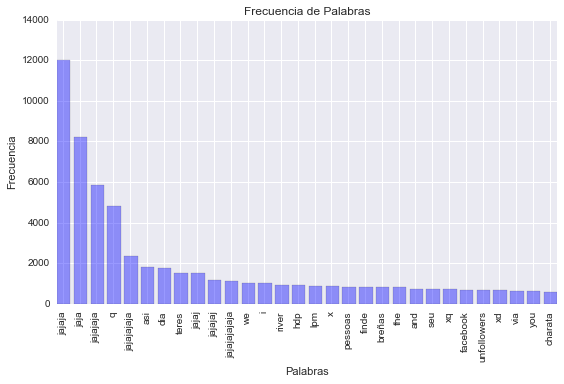

In [51]:
plot(30,noestan)

## Probando TextBlob

In [30]:
from textblob import TextBlob

In [33]:
 wiki = TextBlob("El hombre escribio un libro.")

In [35]:
print wiki.tags
print wiki.noun_phrases
print wiki.words

[('El', u'NNP'), ('hombre', u'NN'), ('escribio', u'NN'), ('un', u'JJ'), ('libro', u'NN')]
['el', u'hombre escribio un libro']
['El', 'hombre', 'escribio', 'un', 'libro']
